
# Project: Analysis of TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The TMDB 5000 Movie Dataset offers a comprehensive collection of information about 5000 movies sourced from The Movie Database (TMDb). It includes a variety of attributes such as movie titles, cast, genres, budget, revenue, user ratings, and more. With this rich dataset, we can delve into the world of movies to uncover insights about their popularity, revenue, genres, and the factors that contribute to their success.

In this analysis, we aim to explore several key questions:

Popularity vs. Director: Is there a correlation between the popularity of a movie and the director behind it? Do certain directors consistently produce more popular films, or does success vary across different projects?

Revenue vs. Popularity: How does the revenue of a movie relate to its popularity? Are highly popular movies also the most financially successful, or are there cases where popularity and revenue diverge?

Genre Trends: What are the most popular movie genres across all years? How do these genres compare in terms of revenue, budget, and audience reception? Are there specific genres that consistently attract larger budgets and generate higher revenues?

By exploring these questions, we aim to gain deeper insights into the dynamics of the movie industry, uncover trends that shape audience preferences, and understand the factors that contribute to the success of movies. Through data analysis and visualization, we will illuminate key findings and provide valuable insights into the world of cinema.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section we are going to study the data structure, shape, variables, and check for and missing data that needed to be fixed.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Import and read the dataset using pandas
df = pd.read_csv("tmdb-movies.csv")

#showing the fisrt five raws of the data (including title bar)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:")
df.shape

Shape of the DataFrame:


(10866, 21)

We can see that the data set includes in total 10866 movies in total and the 21 columns represent various quantitative and qualitative attributes that can be explored to gain insights into the movie industry.

- id: Unique identifier for each entry.
- imdb_id: IMDB identifier for the movie.
- popularity: Popularity score of the movie.
- budget: Budget of the movie.
- revenue: Revenue generated by the movie.
- original_title: Title of the movie.
- cast: Cast members of the movie.
- homepage: URL of the movie's homepage.
- director: Director of the movie.
- tagline: Tagline associated with the movie.
- overview: Brief summary or overview of the movie.
- runtime: Duration of the movie in minutes.
- genres: Genres associated with the movie.
- production_companies: Companies involved in the production of the movie.
- release_date: Release date of the movie.
- vote_count: Number of votes received by the movie.
- vote_average: Average rating of the movie.
- release_year: Year of release of the movie.
- budget_adj: Adjusted budget of the movie (adjusted for inflation).
- revenue_adj: Adjusted revenue of the movie (adjusted for inflation).

In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see from this result, the dataset contains a mix of numerical and categorical data types:
- float64 data type, representing numerical data with decimal points.
- int64 data type, representing integer numerical data. 3- object data type, representing categorical or text data.

The non-null count values in each column indicates the presence of some missing values, in our data set, the columns that have missing values are: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.

some of these columns will not be used in our analysis, so there is no need to perform conversion of data, instead, we will remove these columns by using drop method so we have a cleaner data set to analyze.

In [5]:
# Drop the Unnecessary columns from the DataFrame
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

# Display the first few rows of the cleaned DataFrame after dropping columns
print("First few rows of the cleaned DataFrame after dropping columns:")
df.head()

First few rows of the cleaned DataFrame after dropping columns:


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




## Data Cleaning

In this section we are going to do any neccisry data cleaingn including fixing missing values, remove duplicates, and data format conversion.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
cast                      76
director                  44
genres                    23
production_companies    1030
dtype: int64


In [7]:
def impute_missing_values(dataframe, columns):
    for column in columns:
        dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)

# Columns to impute missing values
columns_to_impute = ['cast', 'director', 'genres']

# Call the function to impute missing values
impute_missing_values(df, columns_to_impute)

# Verify that missing values have been imputed
print("Columns with missing values after imputation:")
print(df.isnull().sum())

Columns with missing values after imputation:
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [8]:
# Check for and remove duplicate rows
df.drop_duplicates()

# Verify that duplicate rows have been removed
print("After removing duplicate rows:")
df.shape

After removing duplicate rows:


(10866, 15)

In [9]:
# Check data format of 'release_date' column
print("Data format of 'release_date' column:")
df['release_date'].head()

Data format of 'release_date' column:


0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [10]:
# Convert 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Check the data format after conversion
print("Data format of 'release_date' column after conversion:")
df['release_date'].head()

Data format of 'release_date' column after conversion:


/var/folders/x7/htybf2b91rb8kvk2922x4qgc0000gn/T/ipykernel_14677/2642798268.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the most famous movie genre across all years, does the director of the movie affect its popularity or not?

To answer this question, we have first to find the most popular movie genre of all time, then we will try to find the five top movies from that genre and see the directors of them to find if a sertine director name is more favoured.

In [91]:
# Split genres and explode them into separate rows
genres_split = df['genres'].str.split('|', expand=True).stack()

# Count occurrences of each genre
genre_counts = genres_split.value_counts()

# Find the most popular genre
most_popular_genre = genre_counts.idxmax()

print("The most popular genre across all years is:", most_popular_genre)

The most popular genre across all years is: Drama


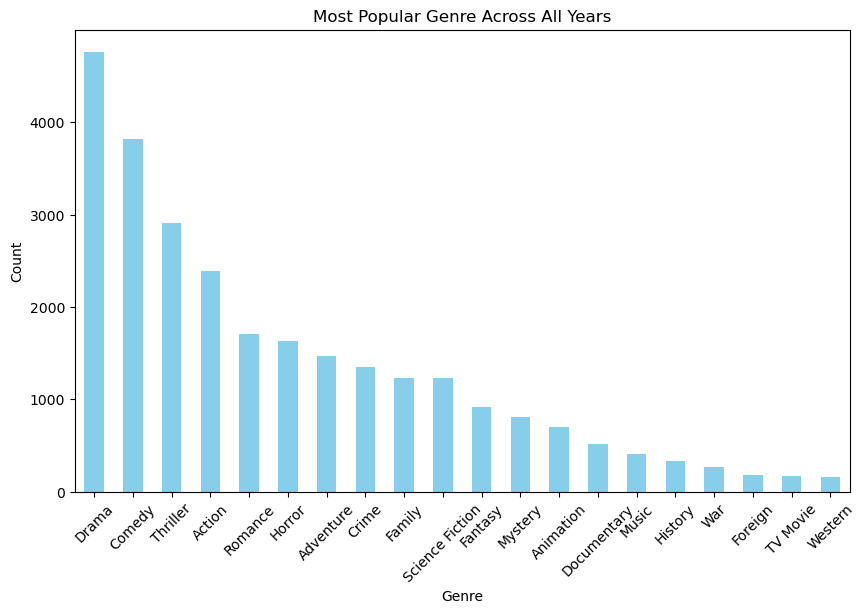

In [92]:
# Split genres and explode them into separate rows
genres_split = df['genres'].str.split('|', expand=True).stack()

# Count occurrences of each genre
genre_counts = genres_split.value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genre Across All Years')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph above shows the most popular movie genres across all years from the data set with drama the highest, followed by comedy, thriller, and action. Those might be the most favored genres as they kinda play with the feelings and adrenalin of people causing them to be attracted to the scenes and the story.

since drama movies are most favored, we are going to find the top five popular drama movies of all time. 

In [12]:
def get_top_movies_by_genre(dataframe, genre, n=5):
    genre_movies = dataframe[dataframe['genres'].str.contains(genre)]
    top_genre_movies = genre_movies.sort_values(by='popularity', ascending=False).head(n)
    return top_genre_movies

# Call the function to get the top 5 drama movies
top_5_drama_movies = get_top_movies_by_genre(df, 'Drama')

# Display the top 5 drama movies
print("Top 5 Drama Movies of All Time According to Popularity")
top_5_drama_movies[['original_title', 'popularity']]

Top 5 Drama Movies of All Time According to Popularity


,original_title,popularity
629,Interstellar,24.949134
5,The Revenant,9.110700
2409,Fight Club,8.947905
2875,The Dark Knight,8.466668
636,The Imitation Game,8.110711


Now we will find the directors of those movies.

In [13]:
# Define the list of movies
movies = ['Interstellar', 'The Revenant', 'Fight Club', 'The Dark Knight', 'The Imitation Game']

# Filter the dataset to include only the specified movies
filtered_movies = df[df['original_title'].isin(movies)]

# Display the directors of the specified movies
filtered_movies[['original_title', 'director']]

,original_title,director
5,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
629,Interstellar,Christopher Nolan
636,The Imitation Game,Morten Tyldum
1707,The Revenant,D. Kerry Prior
2409,Fight Club,David Fincher
2875,The Dark Knight,Christopher Nolan


Out of the five most popular drama movies of all time, there were two movies directed by Christopher Nolan. It can indicate that the quality of films directed by Christopher Nolan might be higher than other directors. In addition, it can also be said that sometimes one can favor films directed by a specific director but that can't be always the only factor in the movie's success.

We will try to find the films directed only by Christopher Nolan and see their popularity to test our theory.

In [14]:
def get_movies_by_director_and_genre(dataframe, director_name, genre):
    filtered_movies = dataframe[(dataframe['director'] == director_name) & (dataframe['genres'].str.contains(genre))]
    return filtered_movies[['original_title', 'popularity']]

# Call the function to get drama movies directed by Christopher Nolan
nolan_drama_movies = get_movies_by_director_and_genre(df, 'Christopher Nolan', 'Drama')

# Display the movie titles and popularity scores
print(nolan_drama_movies)

             original_title  popularity
629            Interstellar   24.949134
2875        The Dark Knight    8.466668
4363  The Dark Knight Rises    6.591277
6191          Batman Begins    5.400826
6565           The Prestige    2.582095
9129              Following    0.225908


From the results we got, it seems that not all the drama movies directed by him have high popularity, he has other films with low popularity rates too. This means that the director plays a role in the success and popularity but not most of the time.

Now we will study the relationship between the revenue and popularity of the 5 most popular Drama movies of all time.

In [15]:
def get_top_movies_by_genre(dataframe, genre, top_n=5):
    # Step 1: Filter the DataFrame for movies of the specified genre
    genre_movies = dataframe[dataframe['genres'].str.contains(genre)]
    
    # Step 2: Sort the filtered DataFrame based on popularity in descending order
    sorted_genre_movies = genre_movies.sort_values(by='popularity', ascending=False)
    
    # Step 3: Select the top n movies based on popularity
    top_n_genre_movies = sorted_genre_movies.head(top_n)
    
    # Step 4: Find the directors for the top n movies
    directors = []
    for title in top_n_genre_movies['original_title']:
        director = dataframe[dataframe['original_title'] == title]['director'].iloc[0]
        directors.append(director)
    
    # Create a DataFrame to display the results
    result_df = pd.DataFrame({'Movie': top_n_genre_movies['original_title'], 'Popularity': top_n_genre_movies['popularity'], 'Director': directors})
    
    return result_df

# Call the function to get the top 5 drama movies
top_drama_movies = get_top_movies_by_genre(df, 'Drama', 5)
print(top_drama_movies)

                   Movie  Popularity                        Director
629         Interstellar   24.949134               Christopher Nolan
5           The Revenant    9.110700  Alejandro GonzÃ¡lez IÃ±Ã¡rritu
2409          Fight Club    8.947905                   David Fincher
2875     The Dark Knight    8.466668               Christopher Nolan
636   The Imitation Game    8.110711                   Morten Tyldum


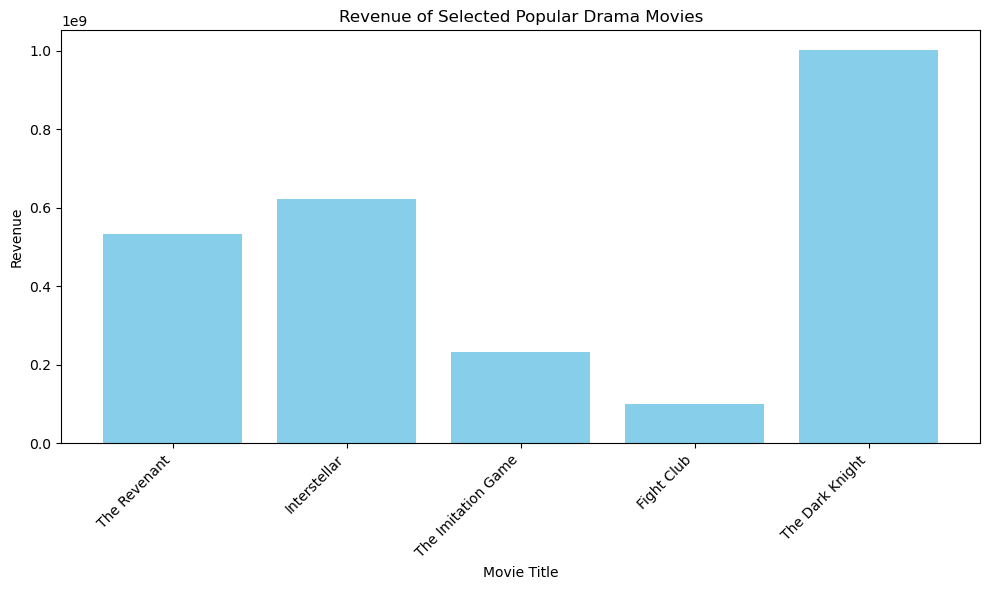

In [16]:
def plot_revenue_of_selected_movies(dataframe, genre, movie_titles, popularity_threshold=8):
    # Filter movies by genre and popularity
    genre_movies = dataframe[dataframe['genres'].str.contains(genre)]
    popular_genre_movies = genre_movies[
        (genre_movies['original_title'].isin(movie_titles)) &
        (genre_movies['popularity'] > popularity_threshold)
    ]

    # Plot the revenues
    plt.figure(figsize=(10, 6))
    plt.bar(popular_genre_movies['original_title'], popular_genre_movies['revenue'], color='skyblue')
    plt.xlabel('Movie Title')
    plt.ylabel('Revenue')
    plt.title(f'Revenue of Selected Popular {genre} Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Call the function to plot revenue of selected drama movies
drama_movie_titles = ['Interstellar', 'The Revenant', 'Fight Club', 'The Dark Knight', 'The Imitation Game']
plot_revenue_of_selected_movies(df, 'Drama', drama_movie_titles)

From this graph, we can see the revenue of each film, both Interstellar and The Dark Night have the highest revenues among all the movies included in the chart and they both were directed by Christopher Nolan, the second highest revenue is The Revenant for Alejandro González Iñárritu, then The Limitation Game for Morten Tyldum and finally Fight Clup directed by David Fincher with the lowest revenue amongst all movies. It's better to compare popularity to revenue to see if there is a relation between them.

To compare popularity to revenue of each movie:

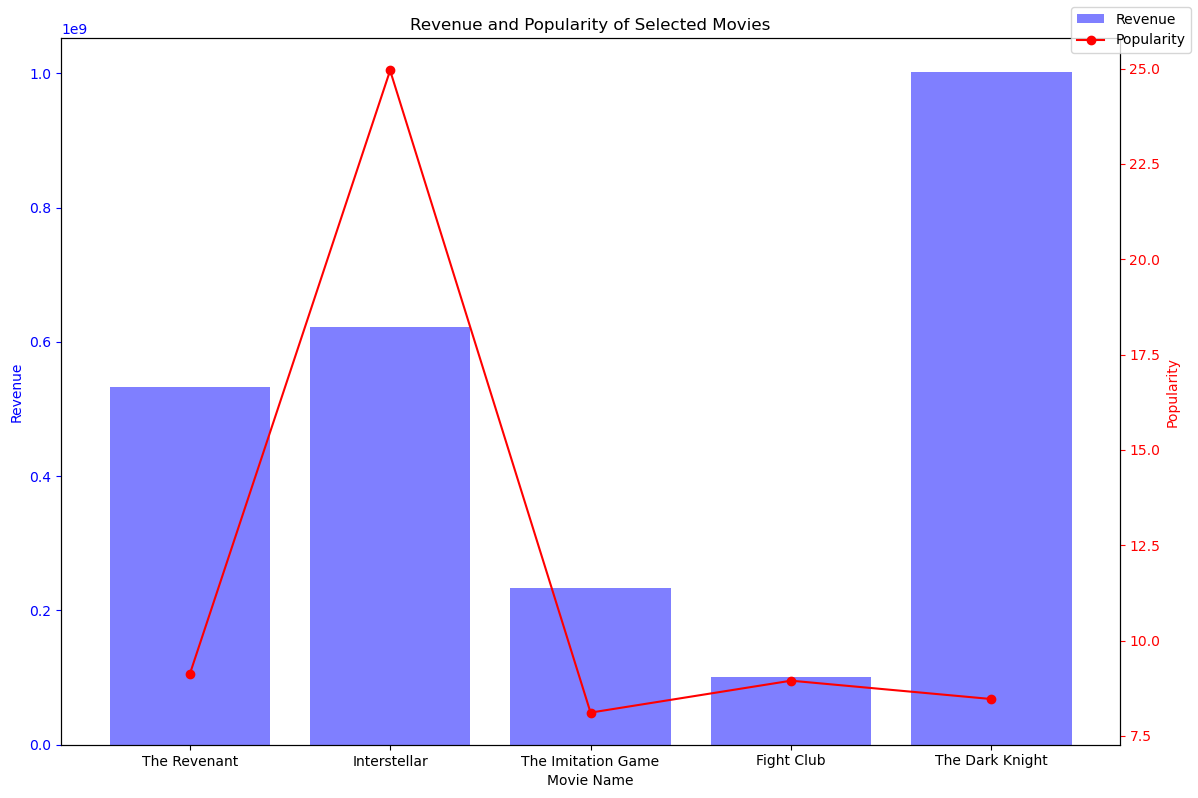

In [18]:
# Data for the movies
movies_data = [
    {"Movie Name": "The Revenant", "Revenue": 532950503, "Popularity": 9.1107, "Director": "Alejandro González Iñárritu"},
    {"Movie Name": "Interstellar", "Revenue": 621752480, "Popularity": 24.949134, "Director": "Christopher Nolan"},
    {"Movie Name": "The Imitation Game", "Revenue": 233555708, "Popularity": 8.110711, "Director": "Morten Tyldum"},
    {"Movie Name": "Fight Club", "Revenue": 100853753, "Popularity": 8.947905, "Director": "David Fincher"},
    {"Movie Name": "The Dark Knight", "Revenue": 1001921825, "Popularity": 8.46666799999999, "Director": "Christopher Nolan"}
]

# Extracting data
movie_names = [movie['Movie Name'] for movie in movies_data]
revenues = [movie['Revenue'] for movie in movies_data]
popularities = [movie['Popularity'] for movie in movies_data]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot revenue
ax1.bar(movie_names, revenues, color='b', alpha=0.5, label='Revenue')
ax1.set_xlabel('Movie Name')
ax1.set_ylabel('Revenue', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for popularity
ax2 = ax1.twinx()
ax2.plot(movie_names, popularities, color='r', marker='o', label='Popularity')
ax2.set_ylabel('Popularity', color='r')
ax2.tick_params('y', colors='r')

# Add legend
fig.legend(loc='upper right')

plt.title('Revenue and Popularity of Selected Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Indeed, these are all popular movies with popularity rates ranging from 8 to 24 in total, we can see that the most popular movie is Interstellar but it is not the one with the highest revenue, the highest revenue goes to The Dark Night, which is the second lowest popular movie. So, the popularity of a movie is not always a direct indicator or a factor for a film to achieve relatively high revenues.

To summarize all our findings from this analysis:

In [101]:
# Filter movies by title and popularity
filtered_movies = df[df['original_title'].isin(['Interstellar', 'The Imitation Game', 'Fight Club', 'The Dark Knight', 'The Revenant'])]
filtered_movies = filtered_movies[filtered_movies['popularity'] > 0]

# Remove the second occurrence of "The Revenant" movie
filtered_movies = filtered_movies[~((filtered_movies['original_title'] == 'The Revenant') & (filtered_movies['director'] == 'D. Kerry Prior'))]

# Select relevant columns
filtered_movies = filtered_movies[['original_title', 'popularity', 'revenue', 'director']]

# Filter "The Revenant" movie and include only its revenue
the_revenant_data = df[(df['original_title'] == 'The Revenant') & (df['popularity'] > 0)].iloc[0]
the_revenant_revenue = the_revenant_data['revenue']
the_revenant_popularity = the_revenant_data['popularity']
the_revenant_director = the_revenant_data['director']

# Print the result
print("Movie Name: The Revenant")
print(f"  - Revenue: {the_revenant_revenue:,}")
print(f"  - Popularity: {the_revenant_popularity}")
print(f"  - Director: {the_revenant_director}")

# Filter other selected movies and print their details
for index, row in filtered_movies.iterrows():
    movie_name = row['original_title']
    if movie_name != 'The Revenant':
        popularity = row['popularity']
        revenue = row['revenue']
        director = row['director']
        print(f"Movie Name: {movie_name}")
        print(f"  - Revenue: {revenue:,}")
        print(f"  - Popularity: {popularity}")
        print(f"  - Director: {director}")

Movie Name: The Revenant
  - Revenue: 532,950,503
  - Popularity: 9.1107
  - Director: Alejandro GonzÃ¡lez IÃ±Ã¡rritu
Movie Name: Interstellar
  - Revenue: 621,752,480
  - Popularity: 24.949134
  - Director: Christopher Nolan
Movie Name: The Imitation Game
  - Revenue: 233,555,708
  - Popularity: 8.110711
  - Director: Morten Tyldum
Movie Name: Fight Club
  - Revenue: 100,853,753
  - Popularity: 8.947905
  - Director: David Fincher
Movie Name: The Dark Knight
  - Revenue: 1,001,921,825
  - Popularity: 8.46666799999999
  - Director: Christopher Nolan


### Research Question 2: Which year has the highest revenue in total, and which movie gener in that year have higher average revenue compared to its budjet?

First of all we are going to find the year with the total highest revenues from the data-set:

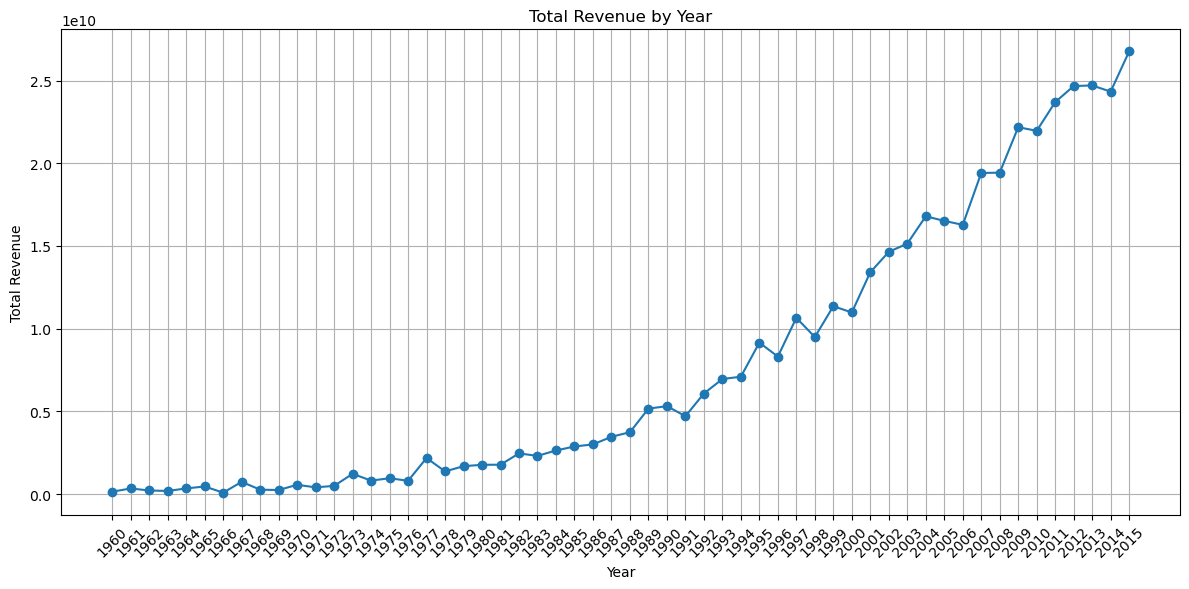

In [102]:
# Group by release year and sum up the revenues
yearly_revenues = df.groupby('release_year')['revenue'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_revenues.index, yearly_revenues.values, marker='o', linestyle='-')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(yearly_revenues.index, rotation=45)
plt.tight_layout()
plt.show()

In [103]:
# Group by release year and sum up the revenues
yearly_revenues = df.groupby('release_year')['revenue'].sum()

# Find the year with the highest total revenues
highest_revenue_year = yearly_revenues.idxmax()
total_highest_revenue = yearly_revenues.max()

print("Year with the highest total revenues:", highest_revenue_year)
print("Total highest revenues in that year:", total_highest_revenue)

Year with the highest total revenues: 2015
Total highest revenues in that year: 26762450518


Now we will find the movies that have higher revenues from the following generes: Drama, Action, and Comedy, since they are the ones with the highest revneues of all time (from question one).

In [106]:
# Filter the dataset to include only movies from the year 2015
movies_2015 = df[df['release_year'] == 2015]

# Initialize empty dictionaries to store the highest-revenue movies for each genre
highest_drama_movie = {}
highest_action_movie = {}
highest_comedy_movie = {}

#we will chose only the highest movei genres we found in quetion 1 which are drama, action, and compedy
# Filter movies for each genre and find the one with the highest revenue
for genre in ['Drama', 'Action', 'Comedy']:
    genre_movies = movies_2015[movies_2015['genres'].str.contains(genre)]
    highest_movie = genre_movies.nlargest(1, 'revenue')
    
    if genre == 'Drama':
        highest_drama_movie = highest_movie
    elif genre == 'Action':
        highest_action_movie = highest_movie
    elif genre == 'Comedy':
        highest_comedy_movie = highest_movie

# Print the highest-revenue movies for each genre
print("Highest-revenue Drama movie in 2015:")
print(highest_drama_movie[['original_title', 'director', 'revenue']])
print()

print("Highest-revenue Action movie in 2015:")
print(highest_action_movie[['original_title', 'director', 'revenue']])
print()

print("Highest-revenue Comedy movie in 2015:")
print(highest_comedy_movie[['original_title', 'director', 'revenue']])

Highest-revenue Drama movie in 2015:
  original_title      director    revenue
7    The Martian  Ridley Scott  595380321

Highest-revenue Action movie in 2015:
                 original_title     director     revenue
3  Star Wars: The Force Awakens  J.J. Abrams  2068178225

Highest-revenue Comedy movie in 2015:
  original_title                  director     revenue
8        Minions  Kyle Balda|Pierre Coffin  1156730962


Now we will find the budget of each movie mentioned above:

In [107]:
# Define the movies
selected_movies = ['The Martian', 'Star Wars: The Force Awakens', 'Minions']

# Filter the DataFrame for the selected movies
filtered_df = df[df['original_title'].isin(selected_movies)]

# Display the budget of these movies
print(filtered_df[['original_title', 'budget']])

                 original_title     budget
3  Star Wars: The Force Awakens  200000000
7                   The Martian  108000000
8                       Minions   74000000


Now we will make a plot to compare the revenue and the budget for each movie:

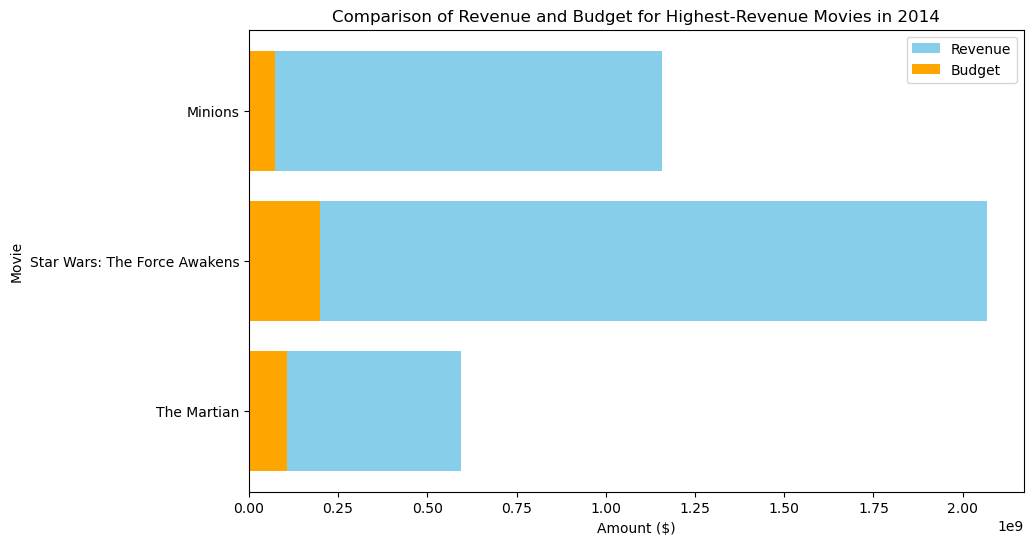

In [108]:
# Movie titles
movies = ['The Martian', 'Star Wars: The Force Awakens', 'Minions']

# Revenue and budget data
revenue = [595380321, 2068178225, 1156730962]
budget = [108000000, 200000000, 74000000]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(movies, revenue, color='skyblue', label='Revenue')
plt.barh(movies, budget, color='orange', label='Budget')

# Labels and title
plt.xlabel('Amount ($)')
plt.ylabel('Movie')
plt.title('Comparison of Revenue and Budget for Highest-Revenue Movies in 2014')
plt.legend()

# Show plot
plt.show()

This graph shows the three highest movies in terms of revenue released in the year 2015, one from each genre, Drama, Action, And Comedy. Star Wars: The Force Awakens has the highest budget and the highest revenue too with revenue exceeding $2,000,000,000. The Minions on the other hand has the lowest budget and comes second in revenue that exceeds $1,150,000,000 and it is a comedy movie. One thing we can conclude from this is that a high movie budget doesn't need to result in high revenue, the budget changes according to the genres, tools, cast crew, and other costs.

To further study the relationship between budget and revenue, we will find the average revenue of movie genres released in 2015 and the average budget.

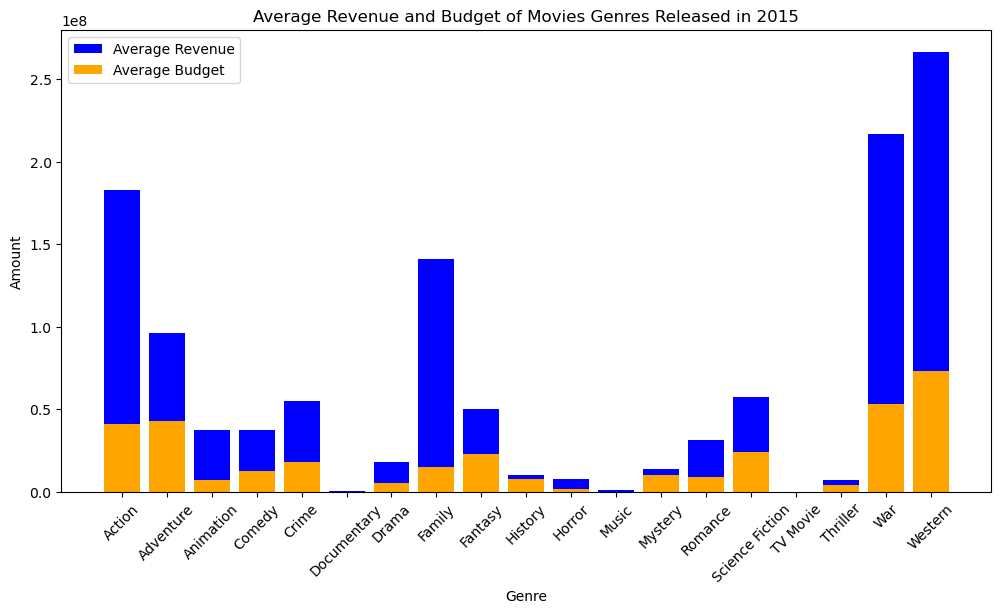

In [109]:
# Filter the DataFrame for movies released in 2015
movies_2015 = df[df['release_year'] == 2015]

# Split the genres column to get individual genres for each movie
genres_split = movies_2015['genres'].str.split('|', expand=True)

# Concatenate the genres with the original DataFrame
movies_2015 = pd.concat([movies_2015, genres_split], axis=1)

# Calculate the average revenue and budget for each genre
average_revenue_by_genre = movies_2015.groupby(0)['revenue'].mean()
average_budget_by_genre = movies_2015.groupby(0)['budget'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot average revenue
plt.bar(average_revenue_by_genre.index, average_revenue_by_genre, color='blue', label='Average Revenue')

# Plot average budget
plt.bar(average_budget_by_genre.index, average_budget_by_genre, color='orange', label='Average Budget')

plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Average Revenue and Budget of Movies Genres Released in 2015')
plt.legend()
plt.xticks(rotation=45)
plt.show()

We can see that the genres with the highest budget are Action, Adventure, War and Westren. Due to factors like:

1- Production Design: These genres frequently involve elaborate sets, costumes, and props to create immersive worlds or historical settings. For example, action and adventure films may feature elaborate stunts, special effects, and CGI to create thrilling sequences, while war and western movies require authentic period details and landscapes.

2- Location Shooting: Many action, adventure, war, and western films are shot on location in remote or exotic locations, which can be costly to access and require extensive logistical planning.

3- Special Effects: Action, adventure, and war movies often rely heavily on visual effects to create spectacular action sequences, epic battles, and larger-than-life scenarios. These effects can be expensive to produce and require advanced technology and expertise.

4- Stunt Coordination: Action-packed genres like action and war movies often involve complex stunts and choreographed fight scenes, which require skilled stunt performers, safety measures, and rehearsal time.

5- Cast and Crew: High-profile actors, directors, and crew members may command large salaries or fees for their involvement in these types of films, contributing to overall production costs.

6- Marketing and Promotion: Studios typically invest significant resources in marketing and promoting action, adventure, war, and western films to attract audiences and generate excitement, adding to the overall budget.

Overall, the scale, scope, and technical demands of these genres often necessitate larger budgets to deliver the spectacle and excitement that audiences expect.

<a id='conclusions'></a>
## Conclusions



Based on the analysis conducted on the TMDB 5000 Movie Dataset, several conclusions can be drawn:

The most popular genre across all years in the dataset is Drama, followed by Comedy, Thriller, and Action. This suggests that viewers are generally drawn to movies that explore human emotions and relationships. We tried to study if a dspesific director can affect the popularity and success of a movie, we concluded that while some directors, like Christopher Nolan, have directed multiple popular movies, it's not always the case that a particular director's movies are consistently popular. The success of a movie depends on various factors beyond just the director, such as the storyline, cast, and marketing.

In addition, the analysis of revenue and popularity for selected movies revealed that while some highly popular movies also had high revenues, there was not always a direct correlation between popularity and revenue. Factors such as genre, storyline, and audience reception can influence a movie's revenue independently of its popularity. Moreover, genres like Action, Adventure, War, and Western typically require higher budgets due to factors like production design, location shooting, special effects, stunt coordination, and marketing. These genres often aim to deliver spectacle and excitement, which necessitates larger investments to deliver the desired cinematic experience and attract audiences. However, a high budget doesn't always guarantee high revenue, as revenue depends on factors like audience reception, competition, and market trends.

In summary, while factors like genre, director, budget, and popularity can influence a movie's success, there's no one-size-fits-all formula for creating a successful film. Each movie's performance is influenced by a combination of factors, and success often depends on the ability to engage audiences and deliver an impactful cinematic experience.
